In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
#Loading CSV file
data =pd.read_csv("all_stocks_5yr.csv")

In [3]:
#Printing the first few rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
#Printing the last few rows
data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
#I just picked the first stock
data = data[data.Name == 'AAL']

In [6]:
#Printing the last few rows
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


In [7]:
from scipy.stats import norm
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 250 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

In [8]:
#Get last closing stock price.
S0 = data.close.iloc[-1]
S0

51.4

In [9]:
#Let us first create en empty matrix such as daily returns
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[51.4, 51.4, 51.4, ..., 51.4, 51.4, 51.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [10]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000
1,51.041371,52.714805,50.022449,51.657610,52.963051,52.773781,52.099526,52.780617,53.217132,52.502222,51.041371
2,51.667407,52.069390,49.532340,55.039251,54.073304,54.043771,54.499510,52.246209,52.275254,51.747459,51.667407
3,51.043769,52.377674,51.558210,54.898439,54.650737,54.947973,54.388371,53.249964,52.676767,53.036785,51.043769
4,50.116452,53.783658,51.399594,54.191161,56.510551,54.607497,53.717493,52.084333,52.302638,51.823368,50.116452


In [11]:
#Concatenating data for forecasting.
close = data.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

In [12]:
#printing first few rows
monte_carlo_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#printing last few rows
monte_carlo_forecast.tail()

,close,0,1,2,3,4,5,6,7,8,9
245,69.602124,69.602124,38.436118,53.352015,47.332688,75.375428,80.743444,65.170875,86.648513,118.643428,143.910934
246,70.536126,70.536126,37.819787,52.281122,46.313001,73.430093,78.439734,66.681033,85.756824,115.121596,141.479657
247,68.664899,68.664899,37.692475,50.844429,46.563216,73.488660,80.240497,68.686022,81.597726,115.282357,139.104774
248,69.051927,69.051927,37.657450,48.503220,47.656063,72.349310,79.505536,69.213426,77.775067,116.943659,139.844869
249,69.848776,69.848776,38.707515,49.586140,46.269552,70.984409,77.780066,69.388545,75.572091,120.803514,130.810954


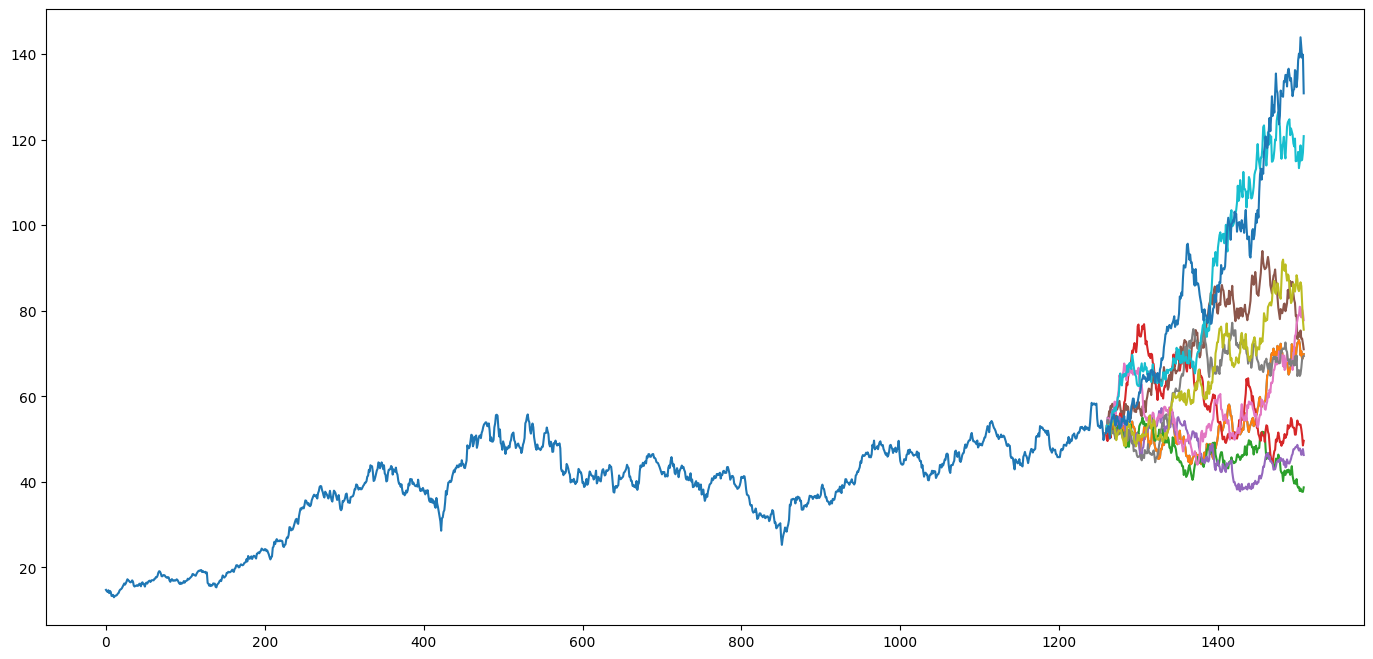

In [14]:
#Monte Carlo Simulation plot.
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()